In [1]:
# FX data was downloaded from https://forextester.com/data/datasources

# Import modules

In [2]:
import os

import numpy as np
import pandas as pd
import pandas_profiling as pdp

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [3]:
print ("numpy:{}".format(np.__version__))
print ("pandas:{}".format(pd.__version__))
print ("tensorflow:{}".format(tf.__version__))

numpy:1.16.4
pandas:0.25.1
tensorflow:1.14.0


## Check directory

In [4]:
current_dir = (os.getcwd())
print (os.listdir(current_dir))

['gan_mlp_lstm_onlstm_fx_checking_bug.ipynb', 'graph.dot', 'look_around_gan_cnn_lstm_stock-Copy1.ipynb', 'gan_mlp_lstm_fx_20190914.ipynb', 'look_around_gan_cnn_lstm_stock.py', 'look_around_gan_cnn_lstm.py', '9449_gmo_20180104-20190831.csv', 'rawdata', 'create_video.ipynb', 'gan_mlp_lstm_fx_20190916.ipynb', 'gan_mlp_lstm_onlstm_fx_stateful_prev_year.ipynb', 'gan_wgan_mlp_lstm_onlstm_fx_20190918.ipynb', 'gan_mlp_lstm_onlstm_fx_diff_previous_year.ipynb', 'HISTDATA_COM_ASCII_USDJPY_T201906', 'look_around_gan_cnn_lstm.ipynb', 'look_around_fx_data.ipynb', 'gan_mlp_lstm_onlstm_fx_diff_large_dataset.ipynb', '9449_gmo_20180104-20181231.csv', 'lstm_and_c_rnn_gan.ipynb', 'tuning_gan_onlstm.ipynb', 'wgan.avi', 'tuning_onlstm_2.ipynb', 'HISTDATA_COM_ASCII_USDJPY_T201905', 'gan_mlp_lstm_onlstm_fx_diff.ipynb', 'gan_mlp_lstm.ipynb', 'gan_mlp_lstm_onlstm_fx_stateful.ipynb', 'train_model', 'tuning_gan_lstm.ipynb', 'network.gv.pdf', 'output', 'tuning_lstm.ipynb', 'data_process_fx.ipynb', 'USDJPY', 'lstm_

In [5]:
print (os.listdir(current_dir+"/USDJPY"))

['usdjpy_train_2015-2017.csv', 'USDJPY.txt', 'USDJPY_1min_201901_201907.csv', 'usdjpy_test_2019.csv', 'usdjpy_test_2018-2019.csv', 'usdjpy_train_2010-2017.csv', 'usdjpy_test.csv', 'USDJPY_1min_201901_201907_macd.csv', 'usdjpy_train_2017.csv', 'usdjpy_train.csv', 'usdjpy_train_2018.csv', 'usdjpy_test_2018.csv']


# Get data

In [6]:
df = pd.read_csv('USDJPY/USDJPY.txt', dtype={'<TIME>': object})
df = df.sort_values(["<DTYYYYMMDD>", "<TIME>"])
df.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDJPY,20010102,230300,114.43,114.43,114.43,114.43,4
1,USDJPY,20010102,230400,114.44,114.44,114.44,114.44,4
2,USDJPY,20010102,230500,114.44,114.44,114.44,114.44,4
3,USDJPY,20010102,230700,114.44,114.44,114.44,114.44,4
4,USDJPY,20010102,230800,114.44,114.44,114.44,114.44,4


In [7]:
df.columns

Index(['<TICKER>', '<DTYYYYMMDD>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>'],
      dtype='object')

In [8]:
df.drop(["<TICKER>", "<HIGH>", "<LOW>", "<CLOSE>", "<VOL>"], axis=1, inplace=True)
df.rename(columns={"<DTYYYYMMDD>": "date", "<TIME>": "time", "<OPEN>": "Open"}, inplace=True)
df.head()

,date,time,Open
0,20010102,230300,114.43
1,20010102,230400,114.44
2,20010102,230500,114.44
3,20010102,230700,114.44
4,20010102,230800,114.44


In [9]:
df['datetime'] = df['date'].astype(str) +' '+ df['time'].astype(str)
df.head()

,date,time,Open,datetime
0,20010102,230300,114.43,20010102 230300
1,20010102,230400,114.44,20010102 230400
2,20010102,230500,114.44,20010102 230500
3,20010102,230700,114.44,20010102 230700
4,20010102,230800,114.44,20010102 230800


In [10]:
print (df.dtypes)
print (df.count())

date          int64
time         object
Open        float64
datetime     object
dtype: object
date        6562022
time        6562022
Open        6562022
datetime    6562022
dtype: int64


In [11]:
df = df[df["time"]!=0]
df.count()

date        6562022
time        6562022
Open        6562022
datetime    6562022
dtype: int64

In [12]:
df["datetime"] = pd.to_datetime(df['datetime'].astype(str), format='%Y%m%d %H%M%f')
df = df.sort_values("datetime")
df.head()

,date,time,Open,datetime
0,20010102,230300,114.43,2001-01-02 23:03:00
1,20010102,230400,114.44,2001-01-02 23:04:00
2,20010102,230500,114.44,2001-01-02 23:05:00
3,20010102,230700,114.44,2001-01-02 23:07:00
4,20010102,230800,114.44,2001-01-02 23:08:00


In [13]:
df[(df["date"]==20190219) & (df["time"]=="100000") ]

,date,time,Open,datetime
6396820,20190219,100000,110.77,2019-02-19 10:00:00


In [14]:
df[(df["date"]==20190220) & (df["time"]=="100000") ]

,date,time,Open,datetime
6398260,20190220,100000,110.77,2019-02-20 10:00:00


In [15]:
df = df[df["time"]=="100000"]
df.head()

,date,time,Open,datetime
613,20010103,100000,114.60,2001-01-03 10:00:00
2006,20010104,100000,114.32,2001-01-04 10:00:00
3405,20010105,100000,116.40,2001-01-05 10:00:00
4653,20010108,100000,116.31,2001-01-08 10:00:00
6059,20010109,100000,115.81,2001-01-09 10:00:00


In [16]:
df.tail(10)

,date,time,Open,datetime
6548460,20190718,100000,107.75,2019-07-18 10:00:00
6549900,20190719,100000,107.63,2019-07-19 10:00:00
6551221,20190722,100000,107.86,2019-07-22 10:00:00
6552661,20190723,100000,108.18,2019-07-23 10:00:00
6554101,20190724,100000,108.05,2019-07-24 10:00:00
6555541,20190725,100000,108.08,2019-07-25 10:00:00
6556981,20190726,100000,108.62,2019-07-26 10:00:00
6558302,20190729,100000,108.61,2019-07-29 10:00:00
6559742,20190730,100000,108.57,2019-07-30 10:00:00
6561182,20190731,100000,108.55,2019-07-31 10:00:00


In [17]:
df.drop(["date", "time"], axis=1, inplace=True)
df = df[["datetime","Open"]]
df.head()

,datetime,Open
613,2001-01-03 10:00:00,114.60
2006,2001-01-04 10:00:00,114.32
3405,2001-01-05 10:00:00,116.40
4653,2001-01-08 10:00:00,116.31
6059,2001-01-09 10:00:00,115.81


In [18]:
df.tail()

,datetime,Open
6555541,2019-07-25 10:00:00,108.08
6556981,2019-07-26 10:00:00,108.62
6558302,2019-07-29 10:00:00,108.61
6559742,2019-07-30 10:00:00,108.57
6561182,2019-07-31 10:00:00,108.55


In [19]:
df_train = df[(df["datetime"]<"2019-01-1 00:00:00") & (df["datetime"]>="2018-01-1 00:00:00")]
df_train.tail()

,datetime,Open
6340402,2018-12-25 10:00:00,110.23
6341842,2018-12-26 10:00:00,110.49
6343282,2018-12-27 10:00:00,110.83
6344722,2018-12-28 10:00:00,110.40
6346033,2018-12-31 10:00:00,110.07


In [20]:
df_train.head()

,datetime,Open
5981359,2018-01-02 10:00:00,112.37
5982799,2018-01-03 10:00:00,112.33
5984239,2018-01-04 10:00:00,112.61
5985679,2018-01-05 10:00:00,113.19
5986989,2018-01-08 10:00:00,113.22


In [21]:
df_test = df[df["datetime"]>="2019-01-1 00:00:00"]
df_test.head()

,datetime,Open
6347295,2019-01-01 10:00:00,109.59
6348735,2019-01-02 10:00:00,108.94
6350175,2019-01-03 10:00:00,107.63
6351615,2019-01-04 10:00:00,108.01
6352935,2019-01-07 10:00:00,108.19


In [22]:
df_test.tail()

,datetime,Open
6555541,2019-07-25 10:00:00,108.08
6556981,2019-07-26 10:00:00,108.62
6558302,2019-07-29 10:00:00,108.61
6559742,2019-07-30 10:00:00,108.57
6561182,2019-07-31 10:00:00,108.55


In [23]:
df_train.to_csv("USDJPY/usdjpy_train_2018.csv", index=False)
df_test.to_csv("USDJPY/usdjpy_test_2019.csv", index=False)

# Get previous data

In [24]:
df_train2 = df[(df["datetime"]<"2018-01-1 00:00:00") & (df["datetime"]>="2017-01-1 00:00:00")]
df_test2 = df[(df["datetime"]<="2018-08-1 00:00:00") & (df["datetime"]>="2018-01-1 00:00:00")]

In [25]:
print (df_train2.head(1))
print (df_train2.tail(1))

                   datetime    Open
5616050 2017-01-02 10:00:00  117.37
                   datetime    Open
5980530 2017-12-29 10:00:00  112.58


In [26]:
print (df_test2.head(1))
print (df_test2.tail(1))

                   datetime    Open
5981359 2018-01-02 10:00:00  112.37
                   datetime   Open
6192140 2018-07-31 10:00:00  111.5


In [27]:
df_train2.to_csv("USDJPY/usdjpy_train_2017.csv", index=False)
df_test2.to_csv("USDJPY/usdjpy_test_2018.csv", index=False)

# Get previous data2

In [28]:
df_train3 = df[(df["datetime"]<"2018-01-1 00:00:00") & (df["datetime"]>="2015-01-1 00:00:00")]
df_test3 = df[(df["datetime"]<="2019-08-1 00:00:00") & (df["datetime"]>="2018-01-1 00:00:00")]
print (df_train3.head(1))
print (df_train3.tail(1))
print (df_test3.head(1))
print (df_test3.tail(1))
df_train3.to_csv("USDJPY/usdjpy_train_2015-2017.csv", index=False)
df_test3.to_csv("USDJPY/usdjpy_test_2018-2019.csv", index=False)

                   datetime    Open
4884929 2015-01-02 10:00:00  120.38
                   datetime    Open
5980530 2017-12-29 10:00:00  112.58
                   datetime    Open
5981359 2018-01-02 10:00:00  112.37
                   datetime    Open
6561182 2019-07-31 10:00:00  108.55


In [29]:
df_train3 = df[(df["datetime"]<"2018-01-1 00:00:00") & (df["datetime"]>="2010-01-1 00:00:00")]
df_test3 = df[(df["datetime"]<="2019-08-1 00:00:00") & (df["datetime"]>="2018-01-1 00:00:00")]
print (df_train3.head(1))
print (df_train3.tail(1))
print (df_test3.head(1))
print (df_test3.tail(1))
df_train3.to_csv("USDJPY/usdjpy_train_2010-2017.csv", index=False)
df_test3.to_csv("USDJPY/usdjpy_test_2018-2019.csv", index=False)

                   datetime   Open
3064676 2010-01-04 10:00:00  92.82
                   datetime    Open
5980530 2017-12-29 10:00:00  112.58
                   datetime    Open
5981359 2018-01-02 10:00:00  112.37
                   datetime    Open
6561182 2019-07-31 10:00:00  108.55


# plot data

In [30]:
df_plot = df[(df["datetime"]<"2019-08-1 00:00:00") & (df["datetime"]>="2018-01-1 00:00:00")]

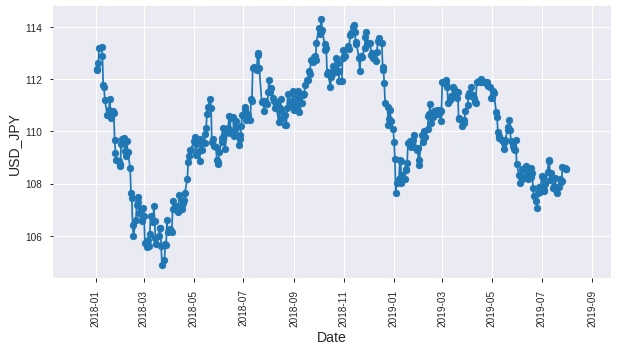

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(df_plot["datetime"],df_plot["Open"])
plt.plot(df_plot["datetime"],df_plot["Open"])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD_JPY', fontsize=14)
plt.savefig('output/usdjpy_overall.png')

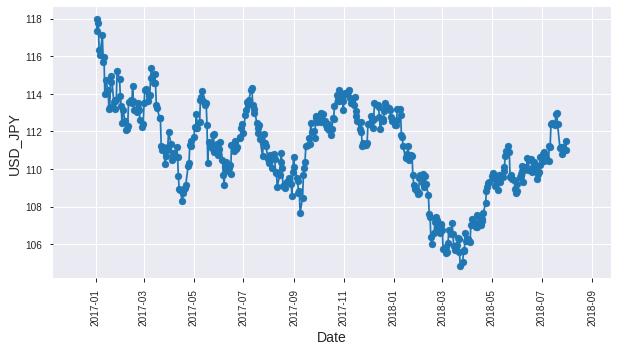

In [32]:
df_plot2 = df[(df["datetime"]<"2018-08-1 00:00:00") & (df["datetime"]>="2017-01-1 00:00:00")]
plt.figure(figsize=(10,5))
plt.scatter(df_plot2["datetime"],df_plot2["Open"])
plt.plot(df_plot2["datetime"],df_plot2["Open"])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD_JPY', fontsize=14)
plt.savefig('output/usdjpy_overall.png')

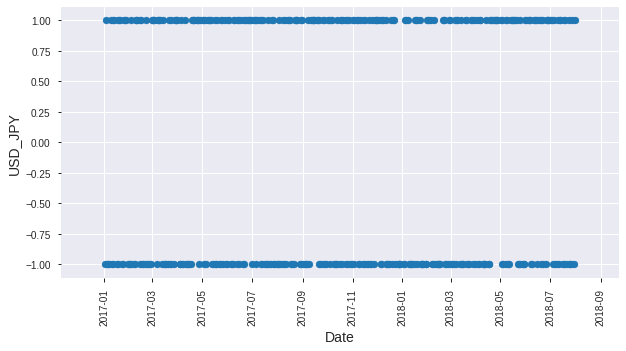

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df_plot2["datetime"],np.where(df_plot2["Open"].diff()>=0, 1, -1))  
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD_JPY', fontsize=14)
plt.savefig('output/usdjpy_overall.png')

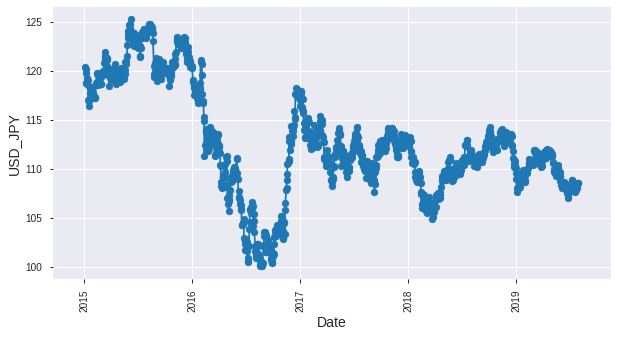

In [34]:
df_plot3 = df[(df["datetime"]<"2019-08-1 00:00:00") & (df["datetime"]>="2015-01-1 00:00:00")]
plt.figure(figsize=(10,5))
plt.scatter(df_plot3["datetime"],df_plot3["Open"])
plt.plot(df_plot3["datetime"],df_plot3["Open"])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD_JPY', fontsize=14)
plt.savefig('output/usdjpy_overall.png')